In [1]:
!pip3 install git+https://github.com/holounic/Bayesian-Optimization.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/holounic/Bayesian-Optimization.git to /tmp/pip-req-build-ahix2dpy
  Running command git clone -q https://github.com/holounic/Bayesian-Optimization.git /tmp/pip-req-build-ahix2dpy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/holounic/pyDOE to /tmp/pip-install-4ixthw4b/pydoe_d7d511259f70463a969c5f1fcf1e31ff
  Running command git clone -q https://github.com/holounic/pyDOE /tmp/pip-install-4ixthw4b/pydoe_d7d511259f70463a969c5f1fcf1e31ff


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.bbobbenchmarks import F8
from bayes_optim.search_space import RealSpace

In [63]:
dim = 2
lb, ub = -5, 5
space = RealSpace([lb, ub]) * dim
f_name = 'f8'
f = F8

samples = space.sample(50000)
doe_size = 6
dim = 2

In [4]:
def fix_numeric_data(df):
  regrets = [float(x[1:-1]) for x in df['regret'].tolist()]
  df['regret'] = regrets
  return df

In [5]:
def minmax_normalisation():
  minmax = []
  for i in range(50):
    func = f(i)
    minmax.append(func(samples).max() - func.getfopt())
  return minmax

In [6]:
def abs_normalisation():
  n = []
  for i in range(50):
    func = f(i)
    n.append(func(samples).mean() - func.getfopt())
  return n

In [67]:
cma_es = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_regret', 'min_dist_to_opt': 'dopt_cma'})
cma_es_init = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_regret', 'min_dist_to_opt': 'dopt_init'})
uniform = fix_numeric_data(pd.read_csv(f'uniform_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'uniform_regret', 'min_dist_to_opt': 'dopt_uni'})
lhs = fix_numeric_data(pd.read_csv(f'lhs_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_regret', 'min_dist_to_opt': 'dopt_lhs'})
halton = fix_numeric_data(pd.read_csv(f'halton_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'halton_regret', 'min_dist_to_opt': 'dopt_hal'})
sobol = fix_numeric_data(pd.read_csv(f'sobol_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'sobol_regret', 'min_dist_to_opt': 'dopt_sob'})
stats = cma_es.merge(uniform.merge(lhs.merge(sobol.merge(halton.merge(cma_es_init)))))
stats['minmax_norm'] = minmax_normalisation()
stats['abs_norm'] = abs_normalisation()
stats.head()

,cma_es_regret,f_s,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,4.795509,0,4.320456,13.609549,4.032802,5.726170,2.545251,180.139940,1.383532,1.653551,2.589033,2.797031,1.730555,560847.955717,80324.977903
1,0.966131,1,2.728567,1.542362,2.117679,2.845405,2.388490,110.874183,1.459707,0.082943,1.261357,1.829519,1.752485,160534.249032,16623.070806
2,0.622004,2,0.957242,9.619277,2.537258,6.730328,1.378006,0.319268,1.162316,0.474555,1.044397,2.330897,0.917046,692655.706406,110334.895920
3,3.043431,3,2.974925,21.783295,2.588720,0.546522,1.190796,1.629811,0.195911,3.425719,1.121187,7.584926,0.737251,239429.651693,26201.500387
4,15.698642,4,2.709922,3.623685,0.537094,10.813254,1.978393,2.041338,2.407376,0.613731,1.393763,1.236061,1.302345,185298.535116,19194.936639


# CMA-ES vs first individual (generated by LHS)

In [69]:
cma_init = stats.loc[stats['cma_es_regret'] < stats['lhs_init_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES improved lhs DoE on 32, (64.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
1,1,0.966131,1.829519,2.728567,1.752485
2,2,0.622004,2.330897,0.957242,0.917046
3,3,3.043431,7.584926,2.974925,0.737251
5,5,1.091377,108.060424,0.484691,1.552706
7,7,2.130476,4.358627,2.690662,1.800451
8,8,0.238367,33.480003,4.164695,1.794182
10,10,0.298821,1.618324,2.528782,1.330027
11,11,1.198859,3.520898,4.507477,2.209895
12,12,0.002897,15.651120,1.855970,0.936010
13,13,0.024728,0.437337,2.366871,1.822580


In [70]:
cma_init = stats.loc[stats['cma_es_regret'] > stats['lhs_init_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES worstened lhs DoE on 18, (36.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
0,0,4.795509,2.797031,4.320456,1.730555
4,4,15.698642,1.236061,2.709922,1.302345
6,6,7.149106,0.589937,1.452293,1.494213
9,9,6.835748,4.276320,4.199145,2.597344
15,15,1.671340,0.739510,0.816987,2.385591
17,17,40.470219,3.817055,1.926442,0.763855
20,20,0.648662,0.144780,2.894797,0.299040
22,22,8.857137,4.212882,2.216294,1.002861
23,23,3.932857,0.559743,3.194973,2.694917
24,24,11.259810,0.492194,1.121861,2.552559


# CMA-ES generated vs Uniform

In [72]:
cma_uniform = stats.loc[stats['cma_es_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_regret', 'uniform_regret', 'dopt_cma', 'dopt_uni']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 30, (60.0%) function instances


,f_s,cma_es_regret,uniform_regret,dopt_cma,dopt_uni
0,0,4.795509,13.609549,4.320456,4.032802
1,1,0.966131,1.542362,2.728567,2.117679
2,2,0.622004,9.619277,0.957242,2.537258
3,3,3.043431,21.783295,2.974925,2.588720
5,5,1.091377,8.317905,0.484691,2.658589
6,6,7.149106,17.067246,1.452293,1.727184
7,7,2.130476,3.730584,2.690662,3.936138
8,8,0.238367,2.690482,4.164695,1.290742
10,10,0.298821,0.991652,2.528782,1.224508
12,12,0.002897,6.382583,1.855970,2.717502


# CMA-ES vs LHS

In [73]:
cma_lhs = stats.loc[stats['cma_es_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_regret', 'lhs_regret', 'dopt_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 27 (54.0%) function instances


,f_s,cma_es_regret,lhs_regret,dopt_cma,dopt_lhs
0,0,4.795509,5.726170,4.320456,2.545251
1,1,0.966131,2.845405,2.728567,2.388490
2,2,0.622004,6.730328,0.957242,1.378006
5,5,1.091377,1.390926,0.484691,1.111414
8,8,0.238367,5.594458,4.164695,1.169649
10,10,0.298821,0.673689,2.528782,2.520999
11,11,1.198859,3.895262,4.507477,2.325056
12,12,0.002897,14.490243,1.855970,0.631525
13,13,0.024728,0.051349,2.366871,1.917855
14,14,4.101530,18.542655,3.291591,2.611070


# CMA-ES vs Sobol

In [74]:
cma_sobol = stats.loc[stats['cma_es_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_regret', 'sobol_regret', 'dopt_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 27 (54.0%) function instances


,f_s,cma_es_regret,sobol_regret,dopt_cma,dopt_sob
0,0,4.795509,180.139940,4.320456,1.383532
1,1,0.966131,110.874183,2.728567,1.459707
5,5,1.091377,3.350135,0.484691,0.953127
7,7,2.130476,2.383184,2.690662,0.312927
8,8,0.238367,3.475825,4.164695,1.913236
10,10,0.298821,5.278734,2.528782,2.504513
11,11,1.198859,3.641218,4.507477,2.707660
12,12,0.002897,32.168563,1.855970,2.281834
13,13,0.024728,1.982471,2.366871,1.040945
14,14,4.101530,10.617775,3.291591,1.610083


# CMA-ES vs Halton

In [75]:
cma_halton = stats.loc[stats['cma_es_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_regret', 'halton_regret', 'dopt_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 28 (56.0%) function instances


,f_s,cma_es_regret,halton_regret,dopt_cma,dopt_hal
3,3,3.043431,3.425719,2.974925,1.121187
6,6,7.149106,88.397229,1.452293,3.332766
8,8,0.238367,4.290194,4.164695,1.583048
11,11,1.198859,2.494132,4.507477,0.978590
12,12,0.002897,0.448713,1.855970,1.967195
13,13,0.024728,1.034911,2.366871,0.737642
14,14,4.101530,5.175030,3.291591,1.576211
16,16,3.250321,15.126580,1.173831,1.006675
18,18,1.623855,4.358441,4.112456,1.339798
19,19,0.028016,2.087634,3.333542,3.017322


In [76]:
cma_is_best = stats.loc[(stats['cma_es_regret'] < stats['halton_regret']) & (stats['cma_es_regret'] < stats['uniform_regret']) & (stats['cma_es_regret'] < stats['lhs_regret']) & (stats['cma_es_regret'] < stats['sobol_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 11 (22.0%) function instances


,cma_es_regret,f_s,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
8,0.238367,8,4.164695,2.690482,1.290742,5.594458,1.169649,3.475825,1.913236,4.290194,1.583048,33.480003,1.794182,648514.039755,97667.371484
12,0.002897,12,1.855970,6.382583,2.717502,14.490243,0.631525,32.168563,2.281834,0.448713,1.967195,15.651120,0.936010,391080.573607,50855.214380
13,0.024728,13,2.366871,0.279846,2.142715,0.051349,1.917855,1.982471,1.040945,1.034911,0.737642,0.437337,1.822580,137214.703229,15717.385437
14,4.101530,14,3.291591,4.679746,2.207174,18.542655,2.611070,10.617775,1.610083,5.175030,1.576211,4.198421,0.545415,296284.223322,34375.456151
18,1.623855,18,4.112456,32.723888,0.579295,2.507067,1.461242,15.198384,2.132511,4.358441,1.339798,39.379757,1.859508,505652.980444,69765.709477
26,0.275482,26,2.035431,0.390121,2.369932,14.555896,1.795514,1.257415,2.350112,7.872930,1.348432,1.220697,1.670372,142518.873902,13697.220185
28,0.001417,28,3.218354,7.926869,1.413288,23.465202,2.874319,2.202189,1.257812,5.231557,2.050312,3.761536,1.009916,291781.064270,33482.678325
30,1.998058,30,1.629034,10.253377,1.417512,9.014532,1.702137,4.894483,2.121574,2.876440,1.132665,26.367427,0.888843,254954.095627,31283.605977
34,1.689692,34,2.882171,4.629288,0.765078,6.717339,1.953943,1.991735,1.255990,4.760157,1.622801,3.690812,2.497415,104369.973129,12828.566287
37,0.220379,37,1.668786,10.075497,1.080045,0.429578,2.579181,2.024670,1.059680,10.179420,1.695177,0.754368,2.843346,93135.045690,11078.424550


In [77]:
best_name = 'uniform_regret'
uniform_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Uniform is the best on {uniform_is_best.shape[0]} ({100 * uniform_is_best.shape[0] / stats.shape[0]}%) function instances')
uniform_is_best

Uniform is the best on 9 (18.0%) function instances


,cma_es_regret,f_s,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
11,1.198859,11,4.507477,0.015744,2.466758,3.895262,2.325056,3.641218,2.707660,2.494132,0.978590,3.520898,2.209895,221344.573001,26897.985453
16,3.250321,16,1.173831,2.531758,3.046855,3.075374,1.006136,15.126580,3.091753,15.126580,1.006675,15.126580,0.750216,385977.297391,50500.025919
19,0.028016,19,3.333542,0.021790,2.857351,0.785021,2.675818,5.663329,2.189322,2.087634,3.017322,3.674922,1.797749,114404.487998,14790.323956
20,0.648662,20,2.894797,0.421819,2.921297,9.748108,1.434082,6.565689,0.952018,95.071721,1.697947,0.144780,0.299040,403755.923378,52380.545400
21,2.309291,21,0.873571,0.203542,2.425843,0.678020,2.564410,0.253126,1.433296,7.237667,0.399484,8.850184,2.439931,119399.205007,12022.562987
27,1.089946,27,0.623825,0.957658,1.738145,9.368405,2.615745,5.336286,1.822937,9.368405,2.295575,1.669842,1.820254,506324.301058,74067.010971
31,3.299410,31,2.255851,0.861433,2.651588,9.631509,1.830626,4.086421,0.646378,4.191165,0.844974,0.607472,3.076399,99058.997716,12070.221319
33,22.463233,33,1.123536,3.774195,3.265697,9.469742,2.054586,17.589977,2.488547,17.589977,0.564915,2.157148,0.757558,386527.565046,50636.923089
39,5.605437,39,3.864461,2.914557,1.094571,3.482400,3.280693,27.430829,1.366799,11.162774,1.188958,2.295616,1.669023,674942.298854,103276.044416


In [78]:
best_name = 'halton_regret'
halton_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Halton is the best on {halton_is_best.shape[0]} ({100 * halton_is_best.shape[0] / stats.shape[0]}%) function instances')
halton_is_best

Halton is the best on 12 (24.0%) function instances


,cma_es_regret,f_s,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,4.795509,0,4.320456,13.609549,4.032802,5.726170,2.545251,180.139940,1.383532,1.653551,2.589033,2.797031,1.730555,560847.955717,80324.977903
1,0.966131,1,2.728567,1.542362,2.117679,2.845405,2.388490,110.874183,1.459707,0.082943,1.261357,1.829519,1.752485,160534.249032,16623.070806
4,15.698642,4,2.709922,3.623685,0.537094,10.813254,1.978393,2.041338,2.407376,0.613731,1.393763,1.236061,1.302345,185298.535116,19194.936639
5,1.091377,5,0.484691,8.317905,2.658589,1.390926,1.111414,3.350135,0.953127,0.514653,0.894625,108.060424,1.552706,191965.678414,19451.497059
10,0.298821,10,2.528782,0.991652,1.224508,0.673689,2.520999,5.278734,2.504513,0.146404,0.800633,1.618324,1.330027,123247.892694,15390.601356
15,1.671340,15,0.816987,3.323224,2.694481,8.063670,2.477006,1.155329,1.022344,0.503685,1.034267,0.739510,2.385591,117797.331363,11845.220606
23,3.932857,23,3.194973,3.414229,2.429387,3.316631,1.048686,3.330947,0.446434,1.794291,2.308746,0.559743,2.694917,183338.700167,20419.191150
24,11.259810,24,1.121861,0.924337,0.887573,3.831702,1.859679,3.040613,2.185631,0.073365,1.111817,0.492194,2.552559,166628.592297,16872.464751
35,5.380666,35,1.345947,23.659532,1.555229,14.619581,3.333275,9.485711,1.542478,3.154284,0.540989,5.523818,1.081282,326396.177261,40467.860116
43,42.935729,43,2.997928,13.658159,1.021539,14.162568,1.518930,39.833454,0.756125,2.468937,2.641961,0.579563,1.372223,93408.073007,14659.916439


In [79]:
best_name = 'lhs_regret'
lhs_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS is the best on {lhs_is_best.shape[0]} ({100 * lhs_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_is_best

LHS is the best on 11 (22.0%) function instances


,cma_es_regret,f_s,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
3,3.043431,3,2.974925,21.783295,2.588720,0.546522,1.190796,1.629811,0.195911,3.425719,1.121187,7.584926,0.737251,239429.651693,26201.500387
7,2.130476,7,2.690662,3.730584,3.936138,0.640811,1.338354,2.383184,0.312927,1.159588,2.664199,4.358627,1.800451,160887.715256,16722.151350
9,6.835748,9,4.199145,1.780079,0.692191,0.396686,2.489884,1.329843,1.798954,1.300925,0.597372,4.276320,2.597344,246126.222499,29523.796656
17,40.470219,17,1.926442,13.829146,2.599690,2.417002,2.195508,4.078408,2.050215,7.156572,0.802278,3.817055,0.763855,489229.944879,68468.353859
29,2.240697,29,2.517600,2.665209,1.252739,0.698349,2.649974,1.024745,1.184286,2.642054,2.996660,0.576704,0.276159,150521.073870,18871.958658
38,3.923850,38,1.299861,34.409474,2.862042,3.900069,2.975461,5.310876,0.242220,17.450278,2.470476,34.859853,0.657200,711933.471835,113828.975738
40,1.640132,40,0.200013,2.345891,1.261227,0.346330,1.388275,0.880759,1.781753,1.926247,1.217851,2.575907,1.520933,130859.872248,12446.704543
42,17.680929,42,3.013000,14.148817,3.728341,0.219616,2.045526,3.963304,0.466130,5.743210,3.419182,14.246698,0.199595,313431.840917,37279.206867
44,3.757502,44,2.724307,1.532310,2.211664,0.144616,0.595372,2.597384,3.179445,0.804450,1.125753,13.729224,1.529254,235299.283328,25006.324918
47,1.602036,47,0.393536,1.091693,3.115658,1.004297,3.098296,4.074712,1.516654,6.409598,0.313168,0.726026,0.937897,448074.452205,62176.317607


In [80]:
best_name = 'lhs_init_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 8 (16.0%) function instances


,cma_es_regret,f_s,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
20,0.648662,20,2.894797,0.421819,2.921297,9.748108,1.434082,6.565689,0.952018,95.071721,1.697947,0.144780,0.299040,403755.923378,52380.545400
23,3.932857,23,3.194973,3.414229,2.429387,3.316631,1.048686,3.330947,0.446434,1.794291,2.308746,0.559743,2.694917,183338.700167,20419.191150
29,2.240697,29,2.517600,2.665209,1.252739,0.698349,2.649974,1.024745,1.184286,2.642054,2.996660,0.576704,0.276159,150521.073870,18871.958658
31,3.299410,31,2.255851,0.861433,2.651588,9.631509,1.830626,4.086421,0.646378,4.191165,0.844974,0.607472,3.076399,99058.997716,12070.221319
33,22.463233,33,1.123536,3.774195,3.265697,9.469742,2.054586,17.589977,2.488547,17.589977,0.564915,2.157148,0.757558,386527.565046,50636.923089
39,5.605437,39,3.864461,2.914557,1.094571,3.482400,3.280693,27.430829,1.366799,11.162774,1.188958,2.295616,1.669023,674942.298854,103276.044416
43,42.935729,43,2.997928,13.658159,1.021539,14.162568,1.518930,39.833454,0.756125,2.468937,2.641961,0.579563,1.372223,93408.073007,14659.916439
47,1.602036,47,0.393536,1.091693,3.115658,1.004297,3.098296,4.074712,1.516654,6.409598,0.313168,0.726026,0.937897,448074.452205,62176.317607


In [81]:
best_name = 'sobol_regret'
sobol_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Sobol sequence is the best on {sobol_is_best.shape[0]} ({100 * sobol_is_best.shape[0] / stats.shape[0]}%) function instances')
sobol_is_best

Sobol sequence is the best on 7 (14.0%) function instances


,cma_es_regret,f_s,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
2,0.622004,2,0.957242,9.619277,2.537258,6.730328,1.378006,0.319268,1.162316,0.474555,1.044397,2.330897,0.917046,692655.706406,110334.895920
6,7.149106,6,1.452293,17.067246,1.727184,5.788300,2.072539,0.027917,2.020857,88.397229,3.332766,0.589937,1.494213,363584.715527,48868.668372
22,8.857137,22,2.216294,51.776287,2.076418,0.654951,0.888978,0.336462,1.679713,6.166256,2.293328,4.212882,1.002861,690421.662728,108097.686552
25,1.383239,25,3.281924,1.163089,1.714604,4.475195,2.856470,0.458183,1.945298,9.952297,1.873168,1.465041,0.863918,101764.418699,16783.878457
32,5.587238,32,0.746595,3.611558,3.003624,3.725922,2.533606,0.272847,2.111281,1.474274,1.854585,2.537284,1.717000,217511.251368,22884.942790
36,0.316932,36,2.381855,20.283424,1.071310,20.880839,1.941125,0.217534,2.029245,46.953112,1.437686,6.258637,0.700464,441241.064950,59336.303153
41,4.520289,41,0.885373,6.496503,1.376906,0.749966,2.287441,0.086743,2.332371,2.613400,2.976214,4.888925,1.680638,310080.555002,38712.556395


([<matplotlib.axis.XTick at 0x7fac7ed7ad50>,
 [Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

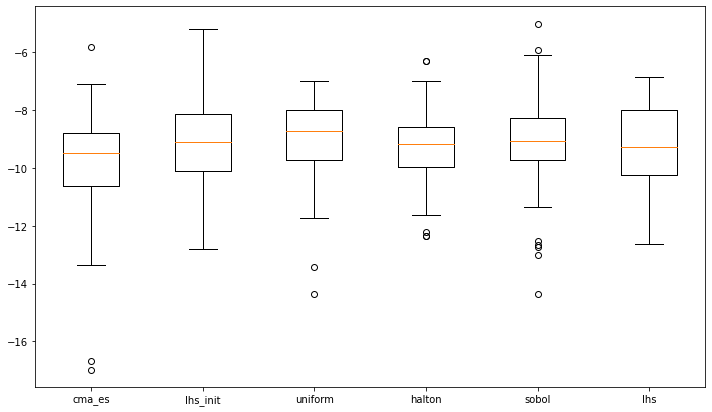

In [82]:
plt.rcParams["figure.figsize"] = (12, 7)

methods = ['cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['abs_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)

([<matplotlib.axis.XTick at 0x7fac7edea090>,
 [Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

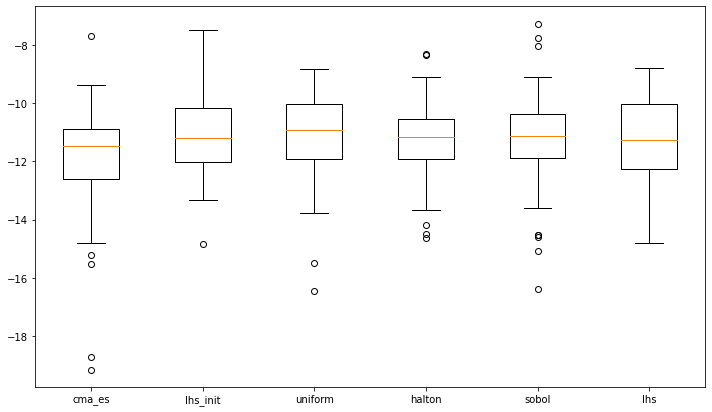

In [83]:
plt.rcParams["figure.figsize"] = (12, 7)

methods = ['cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['minmax_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)